
vLLM Throughput Benchmark

This script benchmarks LLM inference throughput using Hugging Face
generation and vLLM under concurrent load.

It measures:
- Tokens per second
- End-to-end latency
- Queueing effects under staggered arrivals
- Cost per million tokens (derived from throughput)

Designed to run on a single GPU (e.g., free Google Colab T4/L4).



# -------------------------------
# Environment setup and imports
# -------------------------------


In [ ]:
!pip install -q vllm transformers accelerate sentencepiece


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.9/87.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.9/474.9 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.0/355.0 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.0/183.0 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 97.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 116.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB

In [ ]:
import torch

print("CUDA available:", torch.cuda.is_available())
print("GPU:", torch.cuda.get_device_name(0))
print("CUDA version:", torch.version.cuda)


CUDA available: True
GPU: Tesla T4
CUDA version: 12.6


In [ ]:
from vllm import LLM, SamplingParams

llm = LLM(
    model="TinyLlama/TinyLlama-1.1B-Chat-v1.0",
    gpu_memory_utilization=0.85,
    max_model_len=1024,
)

sampling_params = SamplingParams(
    temperature=0.0,
    max_tokens=64,
)

prompts = [
    "Explain what a KV cache is in transformer models."
]

outputs = llm.generate(prompts, sampling_params)

for output in outputs:
    print(output.outputs[0].text)


INFO 12-26 16:07:39 [utils.py:253] non-default args: {'max_model_len': 1024, 'gpu_memory_utilization': 0.85, 'disable_log_stats': True, 'model': 'TinyLlama/TinyLlama-1.1B-Chat-v1.0'}


config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

INFO 12-26 16:08:02 [model.py:514] Resolved architecture: LlamaForCausalLM
WARNING 12-26 16:08:02 [model.py:1955] Your device 'Tesla T4' (with compute capability 7.5) doesn't support torch.bfloat16. Falling back to torch.float16 for compatibility.
WARNING 12-26 16:08:02 [model.py:2005] Casting torch.bfloat16 to torch.float16.
INFO 12-26 16:08:02 [model.py:1661] Using max model len 1024
INFO 12-26 16:08:05 [scheduler.py:230] Chunked prefill is enabled with max_num_batched_tokens=8192.


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

WARNING 12-26 16:08:07 [system_utils.py:136] We must use the `spawn` multiprocessing start method. Overriding VLLM_WORKER_MULTIPROC_METHOD to 'spawn'. See https://docs.vllm.ai/en/latest/usage/troubleshooting.html#python-multiprocessing for more information. Reasons: CUDA is initialized
INFO 12-26 16:12:04 [llm.py:360] Supported tasks: ['generate']


Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype=torch.float16,
    device_map="auto"
)

model.eval()


`torch_dtype` is deprecated! Use `dtype` instead!


LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(32000, 2048)
    (layers): ModuleList(
      (0-21): 22 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (k_proj): Linear(in_features=2048, out_features=256, bias=False)
          (v_proj): Linear(in_features=2048, out_features=256, bias=False)
          (o_proj): Linear(in_features=2048, out_features=2048, bias=False)
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=2048, out_features=5632, bias=False)
          (up_proj): Linear(in_features=2048, out_features=5632, bias=False)
          (down_proj): Linear(in_features=5632, out_features=2048, bias=False)
          (act_fn): SiLUActivation()
        )
        (input_layernorm): LlamaRMSNorm((2048,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((2048,), eps=1e-05)
      )
    )
    (norm): LlamaRMSNorm((2048,), eps=1e-05)
    (rot

In [ ]:
import time

def hf_batched_generate(prompts, max_new_tokens=128):
    inputs = tokenizer(
        prompts,
        return_tensors="pt",
        padding=True
    ).to(model.device)

    start = time.time()

    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=max_new_tokens,
            do_sample=False
        )

    end = time.time()

    total_new_tokens = outputs.shape[1] - inputs["input_ids"].shape[1]
    total_tokens = total_new_tokens * len(prompts)

    return {
        "time": end - start,
        "tokens": total_tokens,
        "tokens_per_sec": total_tokens / (end - start)
    }


In [ ]:
def make_prompts(n, prompt):
    return [prompt for _ in range(n)]

BASE_PROMPT = "Explain what a KV cache is in transformer models."


In [ ]:
batch_sizes = [1, 2, 4, 8, 16]
results = []

for bs in batch_sizes:
    prompts = make_prompts(bs,BASE_PROMPT)
    stats = hf_batched_generate(prompts)

    print(f"Batch size {bs}: {stats['tokens_per_sec']:.2f} tokens/sec")

    results.append({
        "batch_size": bs,
        "tokens_per_sec": stats["tokens_per_sec"],
        "time": stats["time"]
    })


Batch size 1: 0.61 tokens/sec
Batch size 2: 3.68 tokens/sec
Batch size 4: 7.58 tokens/sec
Batch size 8: 15.59 tokens/sec
Batch size 16: 33.87 tokens/sec


In [ ]:
import pandas as pd

df_hf = pd.DataFrame(results)
df_hf.to_csv("hf_baseline_results.csv", index=False)

df_hf


,batch_size,tokens_per_sec,time
0,1,0.609638,1.640316
1,2,3.683568,0.542952
2,4,7.578459,0.527812
3,8,15.593875,0.513022
4,16,33.872854,0.472355


In [ ]:
import time
from vllm import SamplingParams

def vllm_generate(llm, prompts, max_new_tokens=128):
    sampling_params = SamplingParams(
        temperature=0.0,
        max_tokens=max_new_tokens
    )

    start = time.time()
    outputs = llm.generate(prompts, sampling_params)
    end = time.time()

    total_tokens = sum(len(o.outputs[0].token_ids) for o in outputs)

    return {
        "time": end - start,
        "tokens": total_tokens,
        "tokens_per_sec": total_tokens / (end - start)
    }


In [ ]:
batch_sizes = [1, 2, 4, 8, 16]
vllm_results = []

for bs in batch_sizes:
    prompts = make_prompts(bs, BASE_PROMPT)

    stats = vllm_generate(llm, prompts)

    print(f"Batch size {bs}: {stats['tokens_per_sec']:.2f} tokens/sec")

    vllm_results.append({
        "batch_size": bs,
        "tokens_per_sec": stats["tokens_per_sec"],
        "time": stats["time"]
    })


Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Batch size 1: 11.34 tokens/sec


Adding requests:   0%|          | 0/2 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/2 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Batch size 2: 16.71 tokens/sec


Adding requests:   0%|          | 0/4 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/4 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Batch size 4: 33.95 tokens/sec


Adding requests:   0%|          | 0/8 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/8 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Batch size 8: 55.89 tokens/sec


Adding requests:   0%|          | 0/16 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/16 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Batch size 16: 100.15 tokens/sec


In [ ]:
df_vllm = pd.DataFrame(vllm_results)
df_vllm.to_csv("vllm_results.csv", index=False)

df_vllm


,batch_size,tokens_per_sec,time
0,1,11.340585,0.088179
1,2,16.710075,0.119688
2,4,33.948850,0.117824
3,8,55.890333,0.143137
4,16,100.151273,0.159758


vLLM shows limited benefit at low concurrency but significantly improves throughput under concurrent load by dynamically batching token generation and efficiently managing the KV cache.

In [ ]:
import pandas as pd

df_hf = pd.read_csv("hf_baseline_results.csv")
df_vllm = pd.read_csv("vllm_results.csv")

df_hf, df_vllm


(   batch_size  tokens_per_sec      time
 0           1        0.609638  1.640316
 1           2        3.683568  0.542952
 2           4        7.578459  0.527812
 3           8       15.593875  0.513022
 4          16       33.872854  0.472355,
    batch_size  tokens_per_sec      time
 0           1       11.340585  0.088179
 1           2       16.710075  0.119688
 2           4       33.948850  0.117824
 3           8       55.890333  0.143137
 4          16      100.151273  0.159758)

In [ ]:
df_compare = df_hf.merge(
    df_vllm,
    on="batch_size",
    suffixes=("_hf", "_vllm")
)

df_compare["speedup"] = (
    df_compare["tokens_per_sec_vllm"] /
    df_compare["tokens_per_sec_hf"]
)

df_compare


,batch_size,tokens_per_sec_hf,time_hf,tokens_per_sec_vllm,time_vllm,speedup
0,1,0.609638,1.640316,11.340585,0.088179,18.602148
1,2,3.683568,0.542952,16.710075,0.119688,4.536383
2,4,7.578459,0.527812,33.948850,0.117824,4.479651
3,8,15.593875,0.513022,55.890333,0.143137,3.584121
4,16,33.872854,0.472355,100.151273,0.159758,2.956682


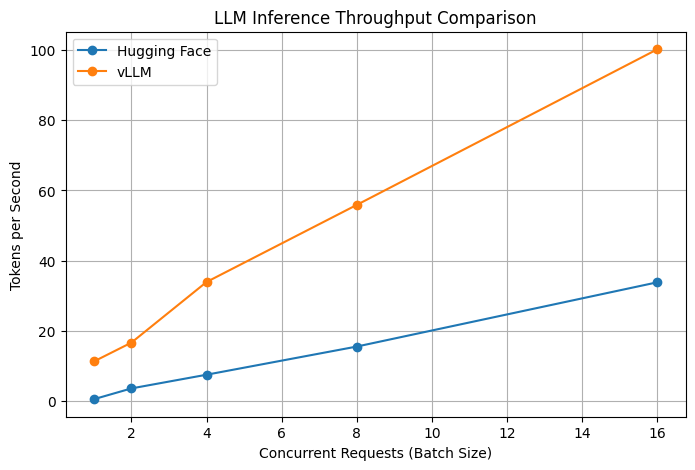

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.plot(
    df_compare["batch_size"],
    df_compare["tokens_per_sec_hf"],
    marker="o",
    label="Hugging Face"
)

plt.plot(
    df_compare["batch_size"],
    df_compare["tokens_per_sec_vllm"],
    marker="o",
    label="vLLM"
)

plt.xlabel("Concurrent Requests (Batch Size)")
plt.ylabel("Tokens per Second")
plt.title("LLM Inference Throughput Comparison")
plt.legend()
plt.grid(True)

plt.savefig("throughput_comparison.png")
plt.show()


In [ ]:
import time
import random

def simulate_arrivals(num_requests, avg_interval_sec):
    arrival_times = []
    current_time = 0.0

    for _ in range(num_requests):
        gap = random.expovariate(1.0 / avg_interval_sec)
        current_time += gap
        arrival_times.append(current_time)

    return arrival_times


In [ ]:
def vllm_queue_simulation(llm, arrival_times, prompt, max_new_tokens=128):
    from vllm import SamplingParams

    sampling_params = SamplingParams(
        temperature=0.0,
        max_tokens=max_new_tokens
    )

    latencies = []
    start_time = time.time()

    for arrival in arrival_times:
        now = time.time() - start_time
        if arrival > now:
            time.sleep(arrival - now)

        req_start = time.time()
        llm.generate([prompt], sampling_params)
        req_end = time.time()

        latencies.append(req_end - req_start)

    return latencies


In [ ]:
arrival_times = simulate_arrivals(
    num_requests=50,
    avg_interval_sec=0.2
)

latencies = vllm_queue_simulation(
    llm,
    arrival_times,
    BASE_PROMPT
)


Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

In [ ]:
import numpy as np

latencies = np.array(latencies)

print("P50 latency:", np.percentile(latencies, 50))
print("P95 latency:", np.percentile(latencies, 95))
print("P99 latency:", np.percentile(latencies, 99))


P50 latency: 0.04831862449645996
P95 latency: 0.08799617290496821
P99 latency: 0.11512349128723143


In [ ]:
GPU_COST_PER_HOUR = 0.35  # approximate T4 on-demand


In [ ]:
def cost_per_million_tokens(tokens_per_sec, gpu_cost_per_hour):
    tokens_per_hour = tokens_per_sec * 3600
    cost_per_token = gpu_cost_per_hour / tokens_per_hour
    return cost_per_token * 1_000_000


In [ ]:
hf_tps = df_compare.loc[df_compare.batch_size == 8, "tokens_per_sec_hf"].item()
vllm_tps = df_compare.loc[df_compare.batch_size == 8, "tokens_per_sec_vllm"].item()

print("HF cost / 1M tokens:", cost_per_million_tokens(hf_tps, GPU_COST_PER_HOUR))
print("vLLM cost / 1M tokens:", cost_per_million_tokens(vllm_tps, GPU_COST_PER_HOUR))


HF cost / 1M tokens: 6.234641704294416
vLLM cost / 1M tokens: 1.7395176821284821
